# **`Machine Learning - Regression Case`**

Anda sebagai MES - Data Analyst PT. Shimano Batam ditugaskan oleh Client untuk membuat analisa report berupa Dashboard dan Machine Learning sederhana untuk melakukan prediksi persentase nilai NC (Non Conformance / Unacceptable) pada produk yang dihasilkan. 

Berdasarkan kasus diatas, tugas yang dapat dilakukan adalah:

`Skenario Regresi`
    
- Melakukan prediksi nilai numerik, misalnya 'NC %' atau jumlah persentase dari NC. 
    
- Feature columns: Semua kolom kecuali 'NC %' dan kolom kategorikal yang telah di-encode.

- target colum: 'NC %'

## **Import Libraries**

In [1]:
# basic - EDA
import pandas as pd 
import numpy as np 
import klib
import seaborn as sns 
import matplotlib.pyplot as plt  

# model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# other
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 30)

## **Load Dataset**

In [2]:
# preview dataset
raw = pd.read_excel(r'D:\Project\Test_Shimano\Factory_Prediction\Data.xlsx')
raw.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Years,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
Month,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Jan,Feb,Feb,Feb,Feb,Feb
Week,2nd,2nd,2nd,2nd,3rd,3rd,3rd,3rd,4th,4th,1st,1st,1st,2nd,2nd
FindingArea,FG,FG,OTC,FG,FG,FG,FG,FG,FG,FG,FG,FG,FG,FG,FG
Factory,ABC,ABC,ABC,ABC,ABC,ABC,ABC,ABC,HCL,ABC,ABC,ABC,ABC,ABC,ABC
GroupingFactory,ABC,ABC,ABC,ABC,ABC,ABC,ABC,ABC,SUBCON,ABC,ABC,ABC,ABC,ABC,ABC
DepartmentResponsible,Mr. Februari,Mr. Februari,Mr. Maret,Mr. April,Mr. April,Mr. Mei,Mr. Januari,Mr. Januari,Mr. Dafit,Mr. Januari,Mr. Januari,Mr. Januari,Mr. Januari,Mr. Januari,Mr. June
Product,SG,SM,FD,BB,BB,RD,SL,SL,CS,SL,SL,SL,SL,SL,DH
MainModel,SG 3C41,SM-CJ8S20,FD-R2030,BB-ES300,BB-UN26K,RD M310,ST-EF41,ST-EF41,CS-HG201,SL-MT500,SL-M3100,ST-EF65,ST-EF41,ST-EF65,DH-C30003N
Model/Production Code,SG 3C41 (168mm) (LH non-turn) \n235U7010326,SM-CJ8S20 Unit Set GP1\n30015685,FD-R2030 (BRAZED ON) OTC (Packing)\n22B22400037,BB-ES300 113 73\n21V90003056,BB-UN26K LL123 68\n21S1D120356,RD M310 OTC (Packing)\n25W87200237,ST-EF41 (F) 3 SPEED\n26UC2000056,ST-EF41 (F) 3 SPEED\n26UC2000056,CS-HG201 BO\n40050112,SL-MT500-IL\n20L72001056,SL-M3100-2L\n20LJ2000066,ST-EF65-2A (F) 3 SPEED\n26UG2001256,ST-EF41 (F) 3 SPEED\n26UC2000056,ST-EF65-2A (F) 3 SPEED\n26UG2001256,DH-C30003N (Nut Type)\n22AV8001126


In [3]:
# menampilkan informasi umum 
print(raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Years                  287 non-null    int64         
 1   Month                  287 non-null    object        
 2   Week                   287 non-null    object        
 3   FindingArea            287 non-null    object        
 4   Factory                287 non-null    object        
 5   GroupingFactory        287 non-null    object        
 6   DepartmentResponsible  287 non-null    object        
 7   Product                287 non-null    object        
 8   MainModel              287 non-null    object        
 9   Model/Production Code  287 non-null    object        
 10  QTY                    286 non-null    object        
 11  SamplingChek           287 non-null    int64         
 12  SamplingNC             287 non-null    int64         
 13  NC % 

In [4]:
# melihat statistik dasar dataset
raw.describe()

,Years,SamplingChek,SamplingNC,NC %,DateProduce,TimeProduce
count,287.000000,287.000000,287.000000,287.000000,171,171.000000
mean,2016.020906,59.195122,3.121951,0.188900,2018-09-24 19:22:06.315789568,11.123977
min,2014.000000,1.000000,1.000000,0.001667,2016-12-31 00:00:00,0.050000
25%,2014.000000,20.000000,1.000000,0.033333,2017-11-08 00:00:00,8.310000
50%,2016.000000,25.000000,1.000000,0.050000,2018-12-13 00:00:00,10.310000
75%,2018.000000,50.000000,2.000000,0.200000,2019-05-15 00:00:00,14.235000
max,2018.000000,3000.000000,53.000000,1.000000,2024-04-22 00:00:00,23.560000
std,1.584314,224.852423,5.897947,0.285212,NaN,5.152131


In [5]:
# Menampilkan data duplicate dari dataset
duplicates = raw[raw.duplicated()]
print("Jumlah data duplicate:", duplicates.shape[0])
print(duplicates)

Jumlah data duplicate: 0
Empty DataFrame
Columns: [Years, Month, Week, FindingArea , Factory, GroupingFactory, DepartmentResponsible, Product, MainModel, Model/Production Code, QTY, SamplingChek, SamplingNC, NC %, NCDescription, TypeOfNC, Factor, GroupingFactor, LeaderName, DateProduce, TimeProduce, Shift]
Index: []


In [6]:
# Menampilkan nilai unik dari setiap kolom
def display_unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

unique_values = display_unique_values(raw)

# Menampilkan hasil
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':\n{values}\n")

Unique values in column 'Years':
[2014 2015 2016 2017 2018]

Unique values in column 'Month':
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Unique values in column 'Week':
['2nd' '3rd' '4th' '1st' '1s']

Unique values in column 'FindingArea ':
['FG' 'OTC' 'SL' 'SM' 'RD' 'CQ' 'FD']

Unique values in column 'Factory':
['ABC' 'HCL' 'SIP' 'SOLO']

Unique values in column 'GroupingFactory':
['ABC' 'SUBCON']

Unique values in column 'DepartmentResponsible':
['Mr. Februari' 'Mr. Maret' 'Mr. April' 'Mr. Mei' 'Mr. Januari'
 'Mr. Dafit' 'Mr. June' 'Mr. July' 'Mr. Zulkifli' 'Mr. Gorga'
 'Mr. Hardiansyah' 'Mr. Hariyanto' 'Mr. Nirwan' 'Mr. Agustus'
 'Mr. September' 'Mr. Angga' 'Mr. Didik' 'Mr. Lufdi' 'Mr. Rachmat FD']

Unique values in column 'Product':
['SG' 'SM' 'FD' 'BB' 'RD' 'SL' 'CS' 'DH' 'SC' 'RT']

Unique values in column 'MainModel':
['SG 3C41' 'SM-CJ8S20' 'FD-R2030' 'BB-ES300' 'BB-UN26K' 'RD M310'
 'ST-EF41' 'CS-HG201' 'SL-MT500' 'SL-M3100' 'ST-EF65' 'DH-C30003

## **Data Distribution**

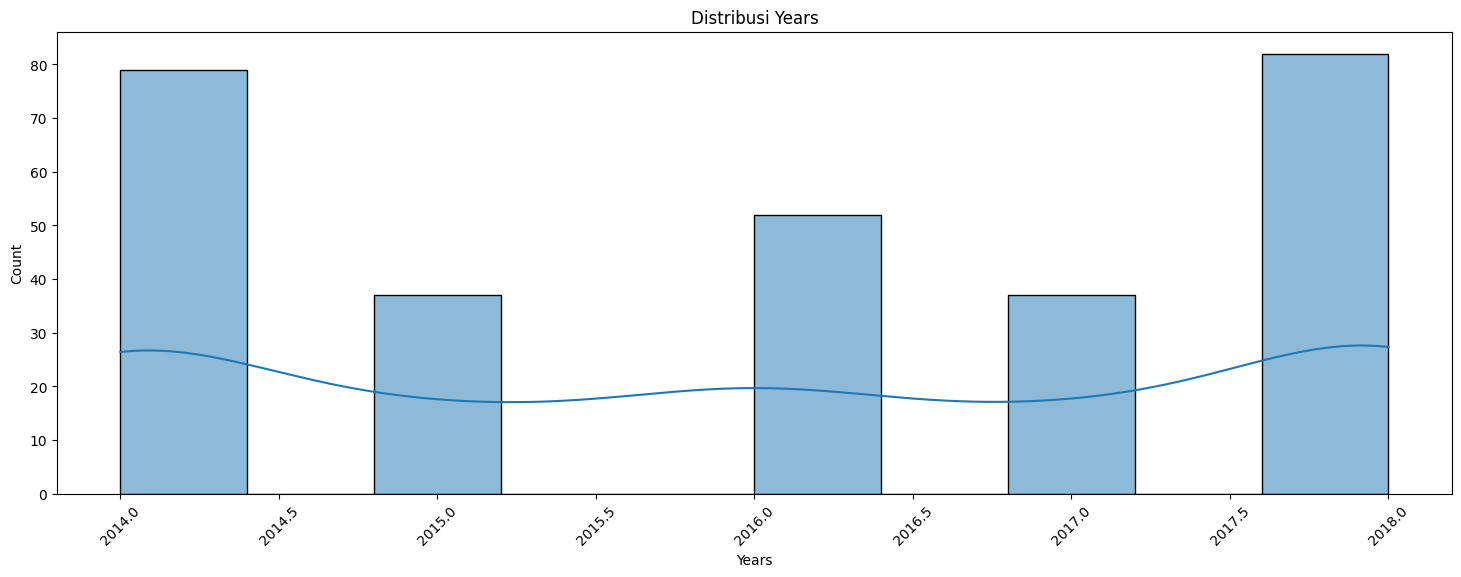

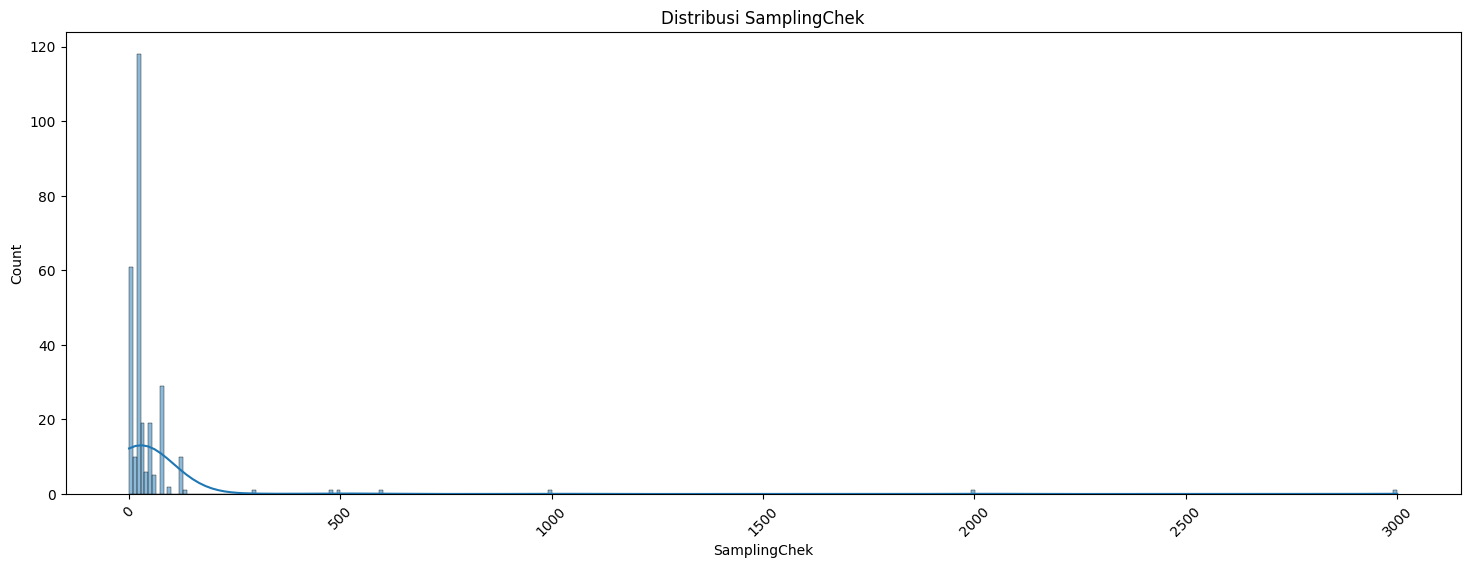

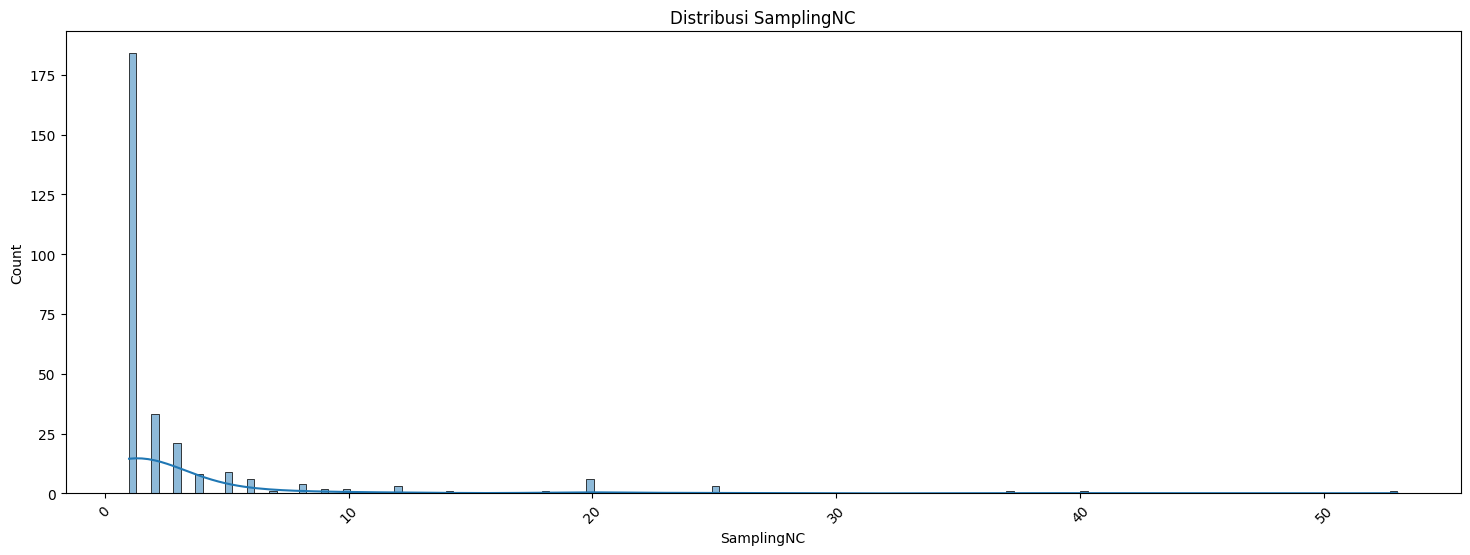

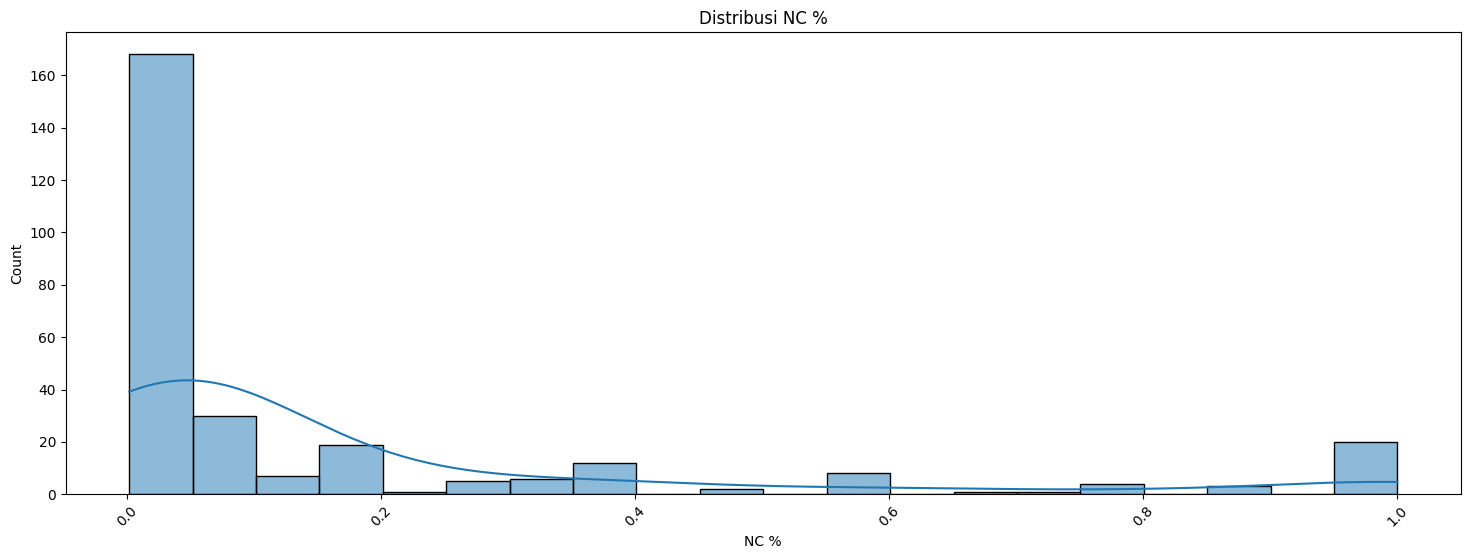

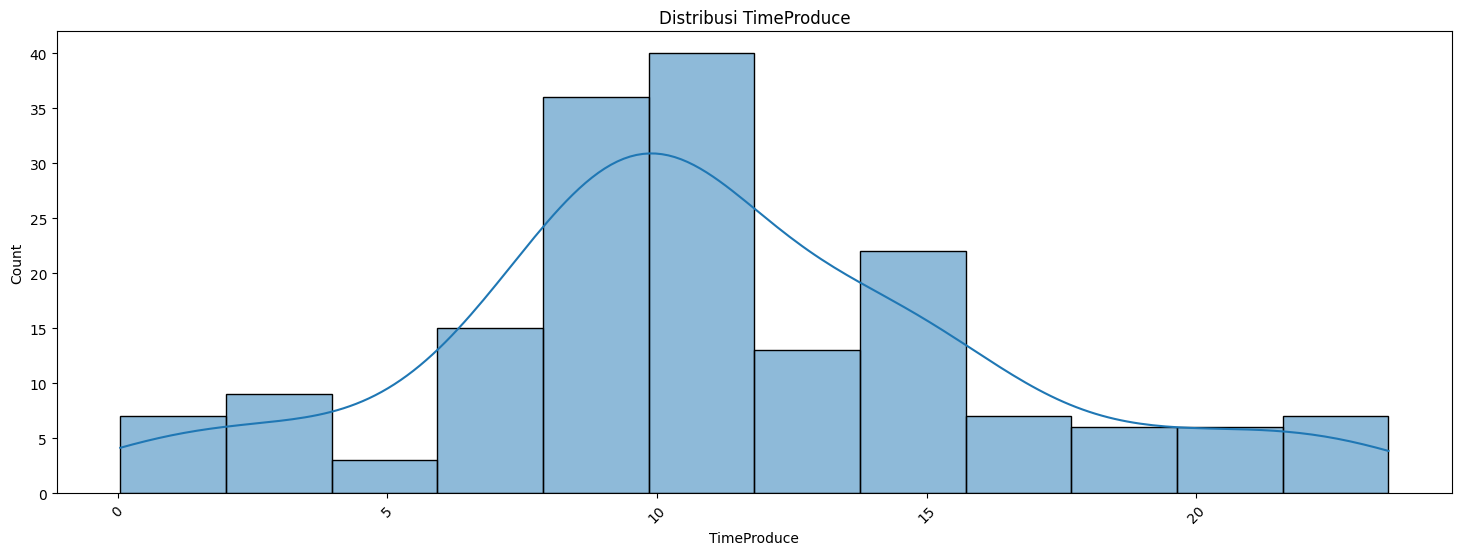

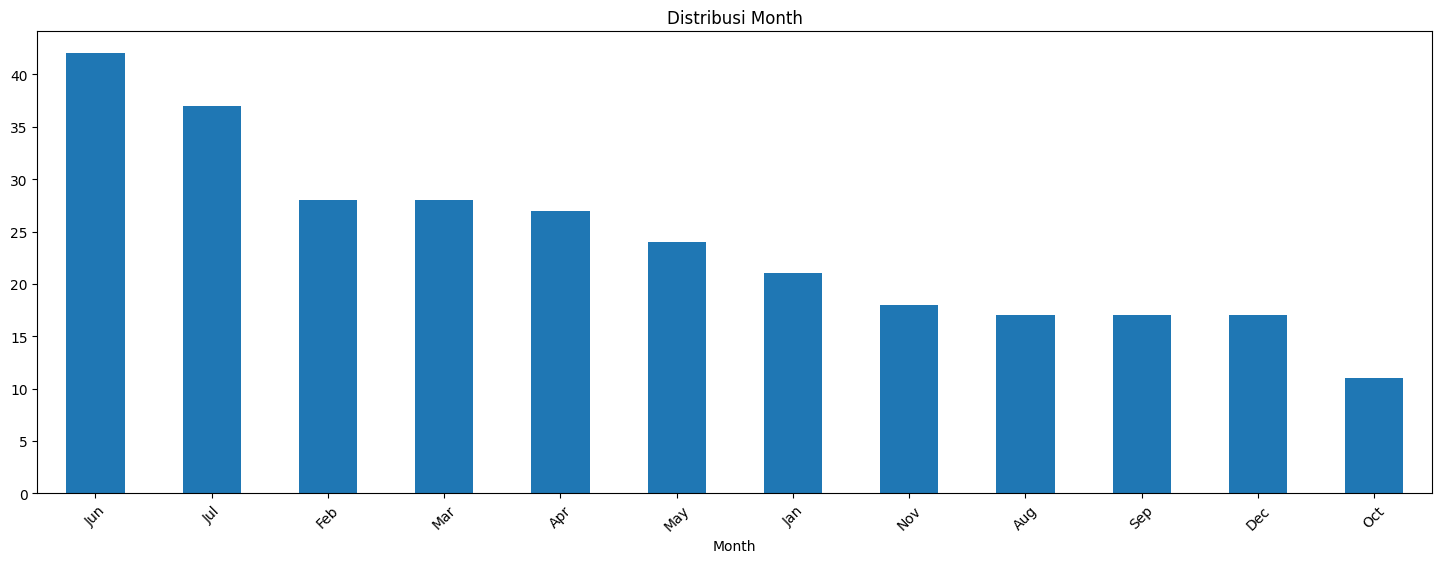

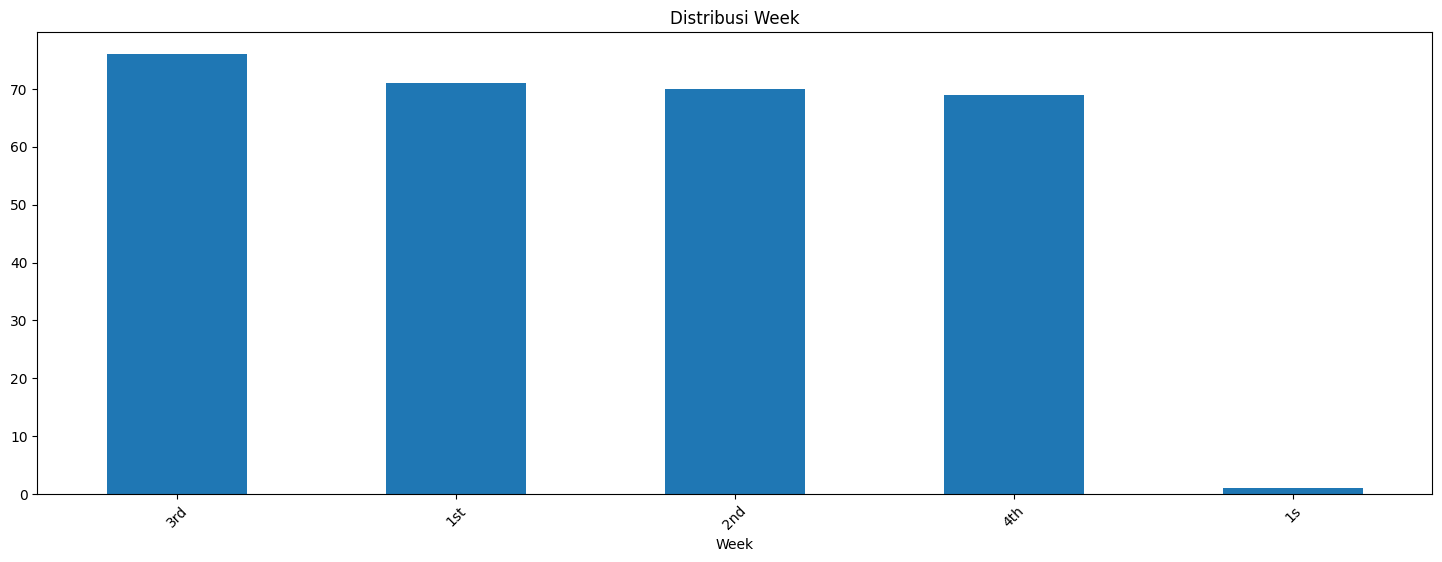

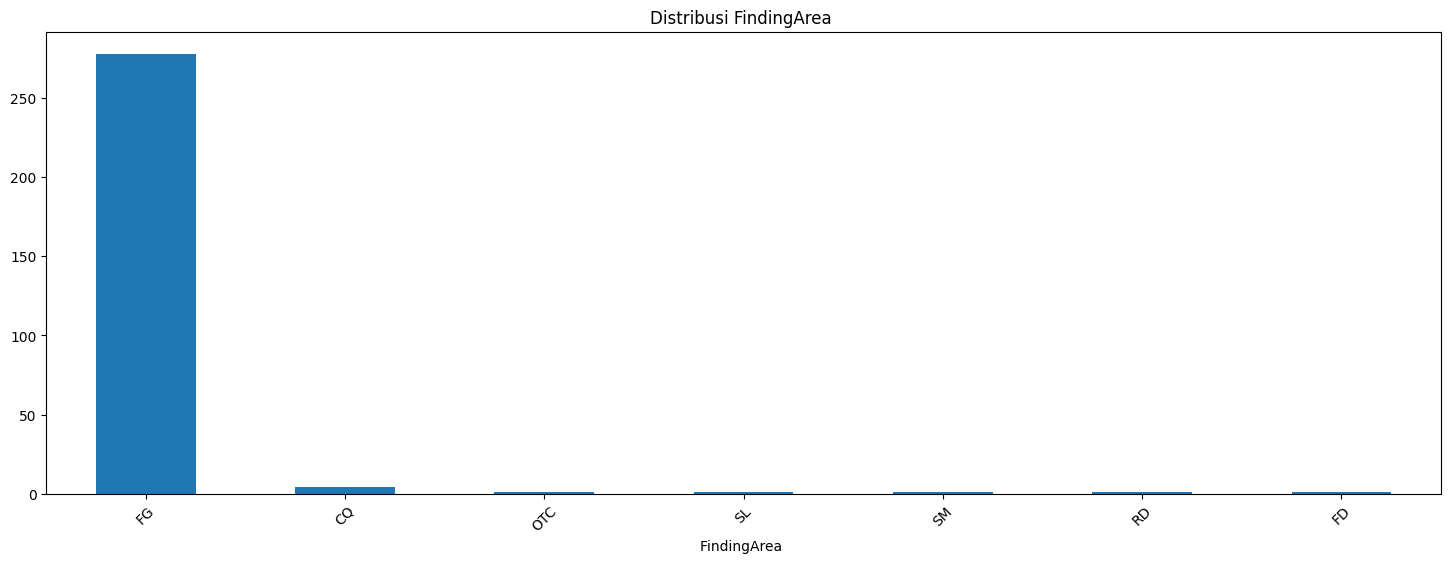

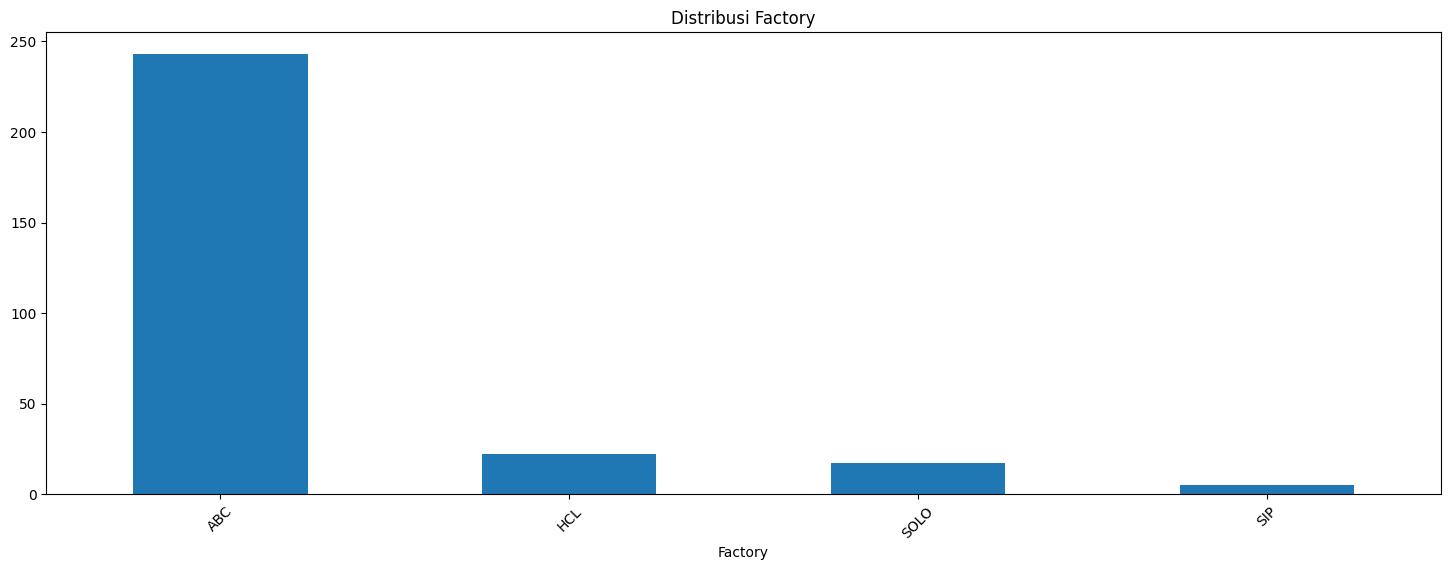

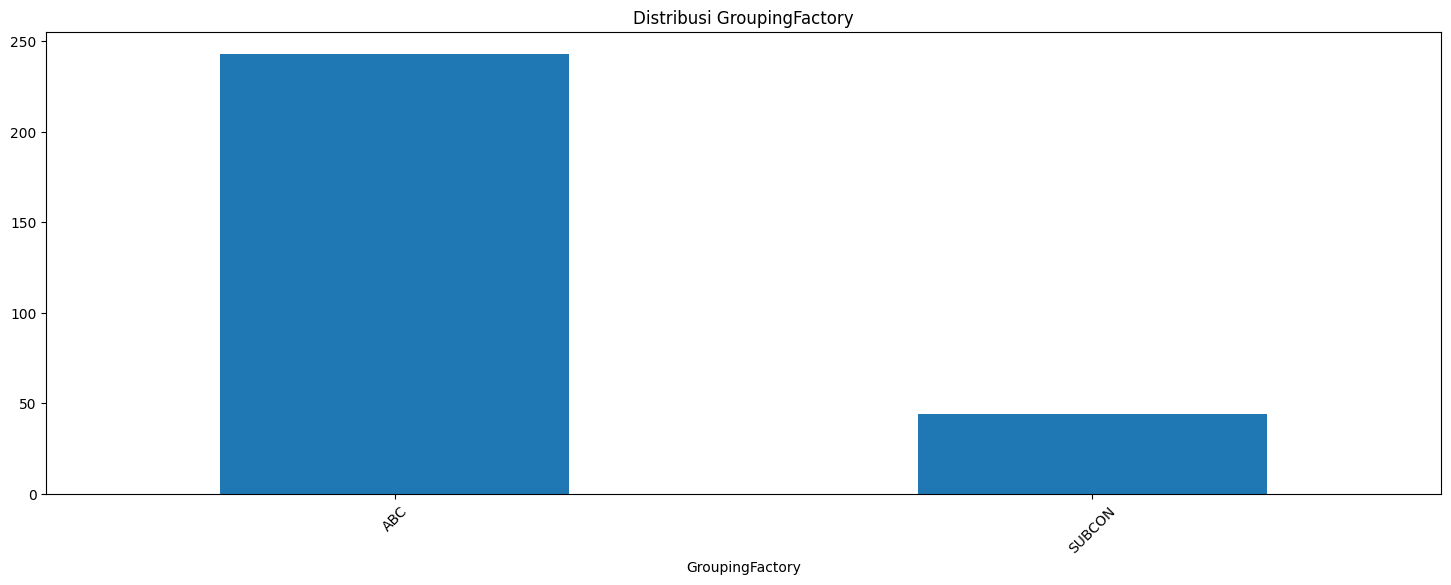

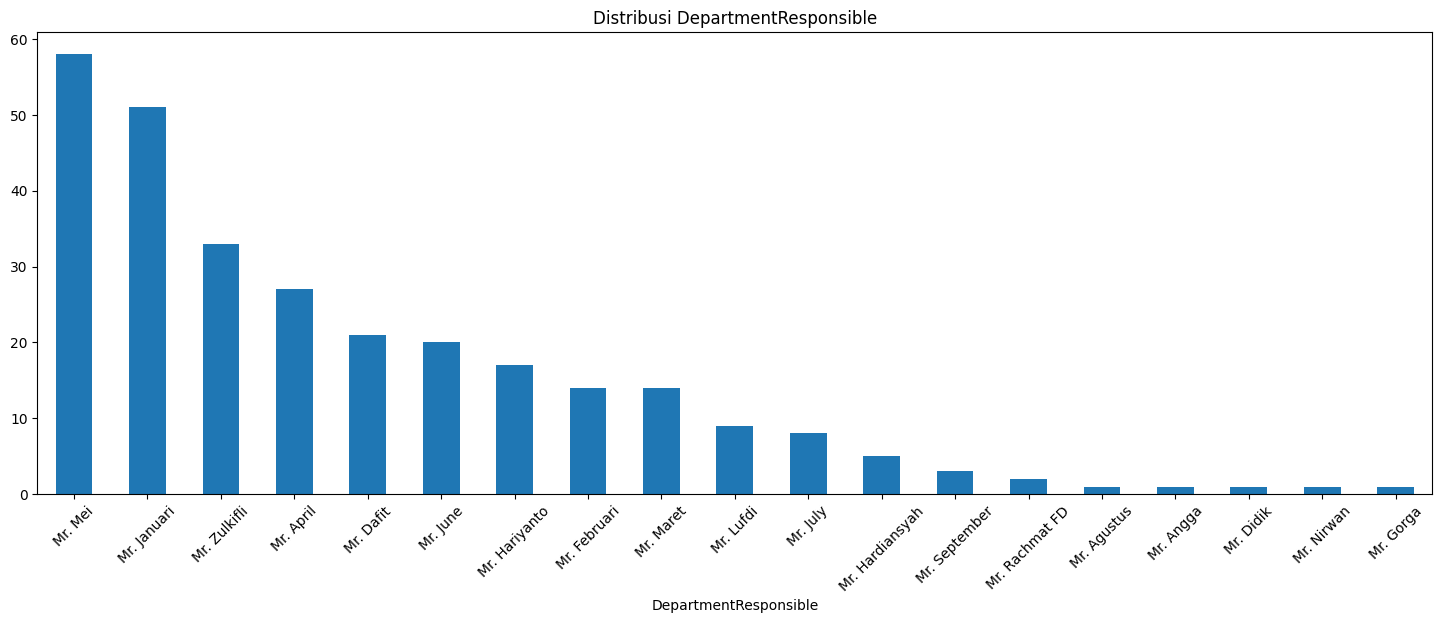

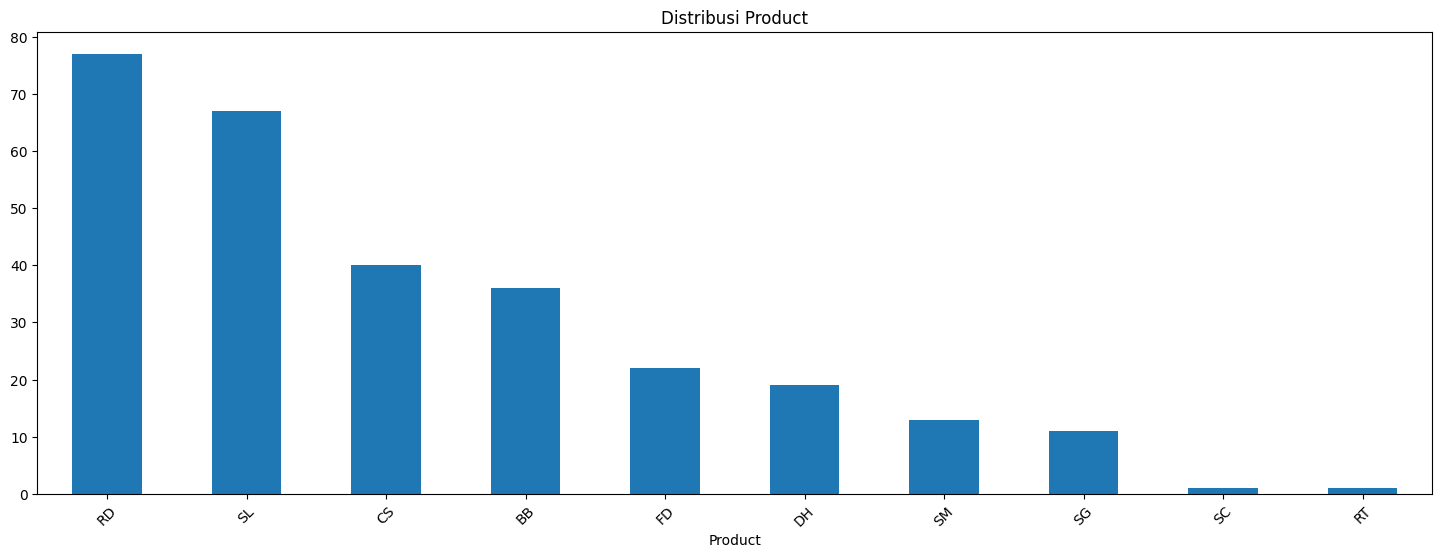

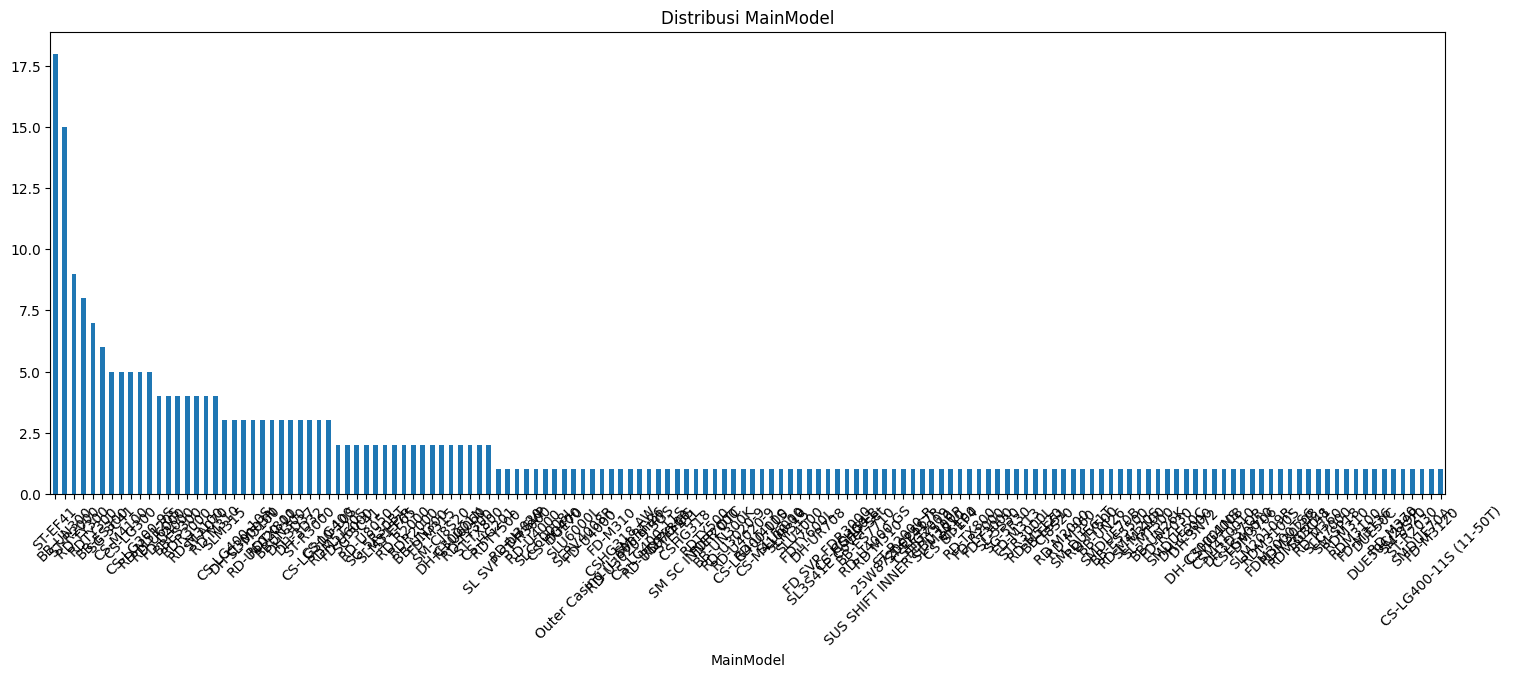

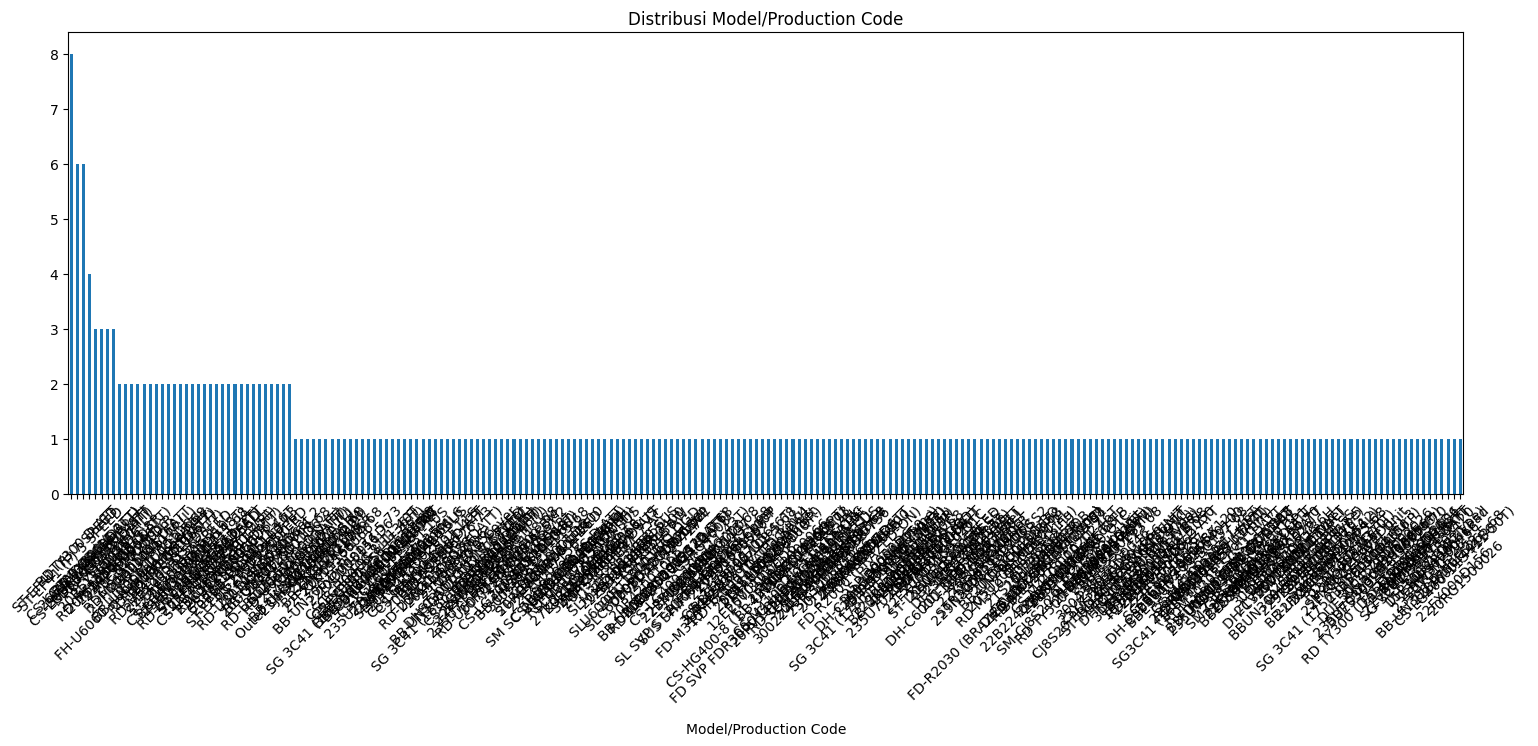

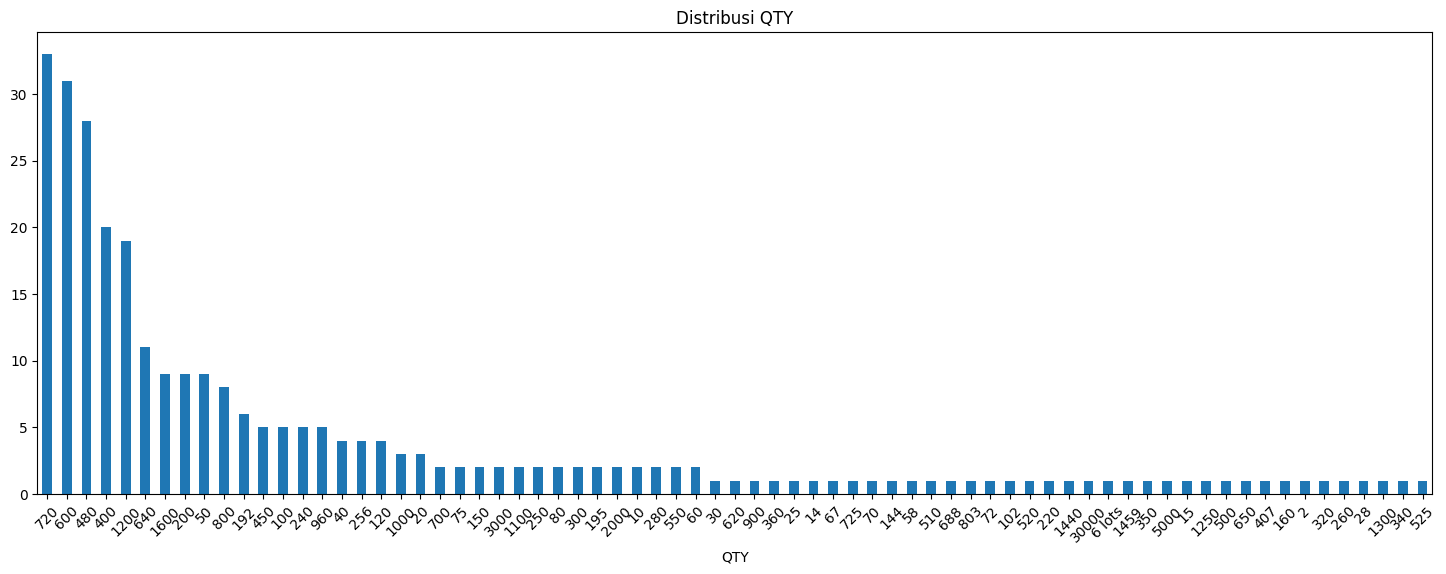

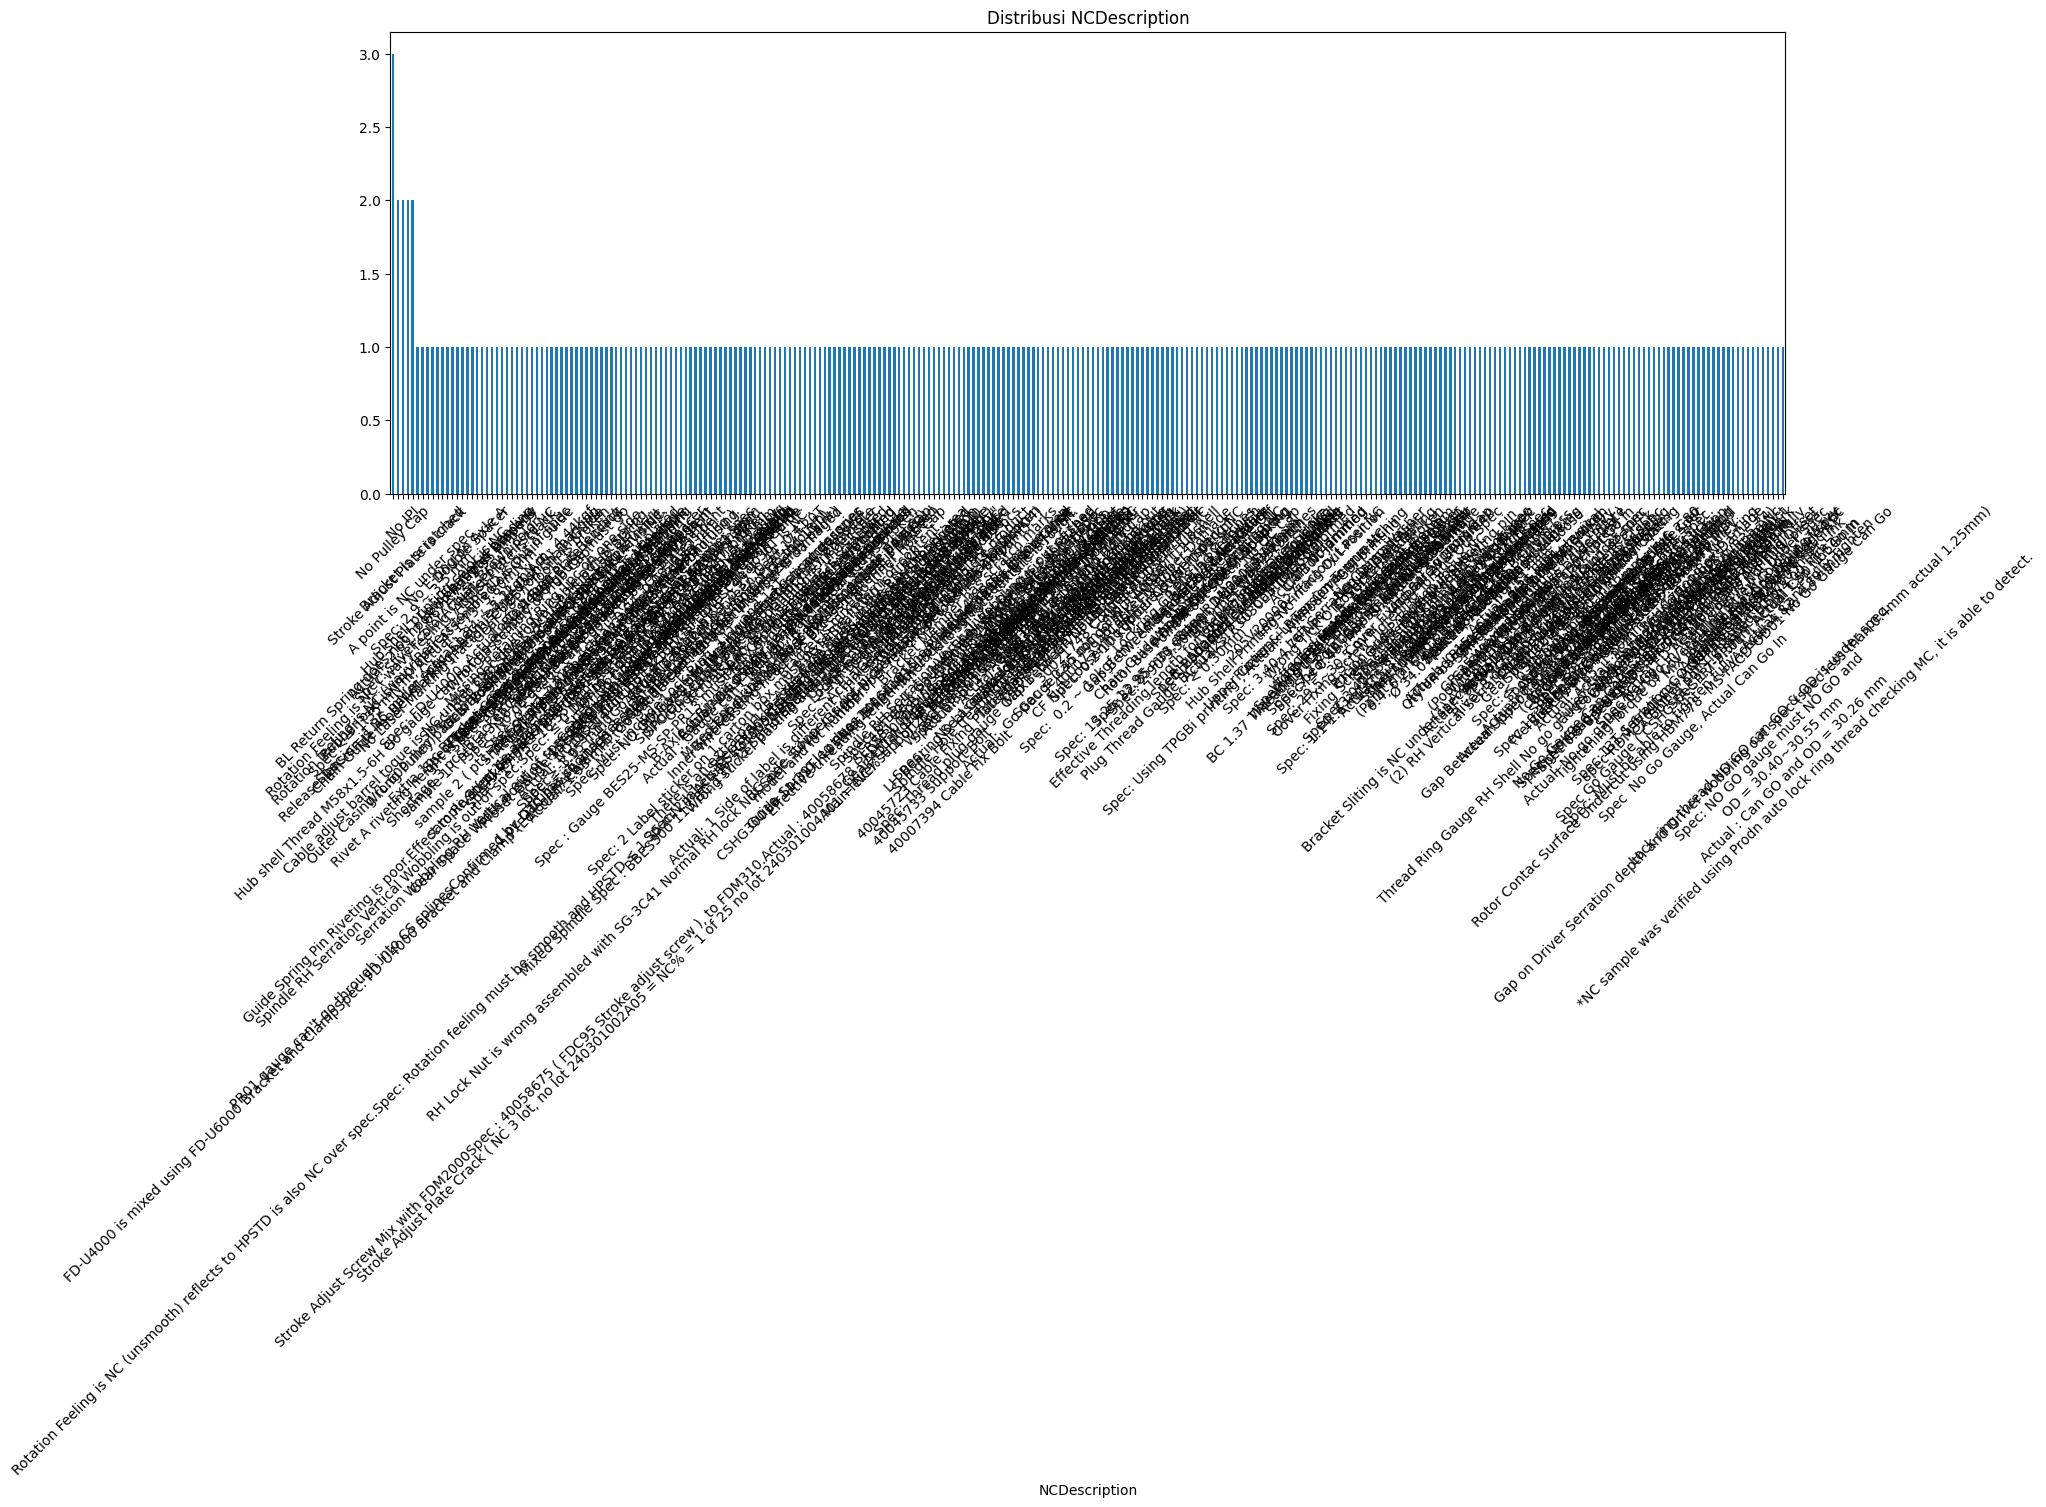

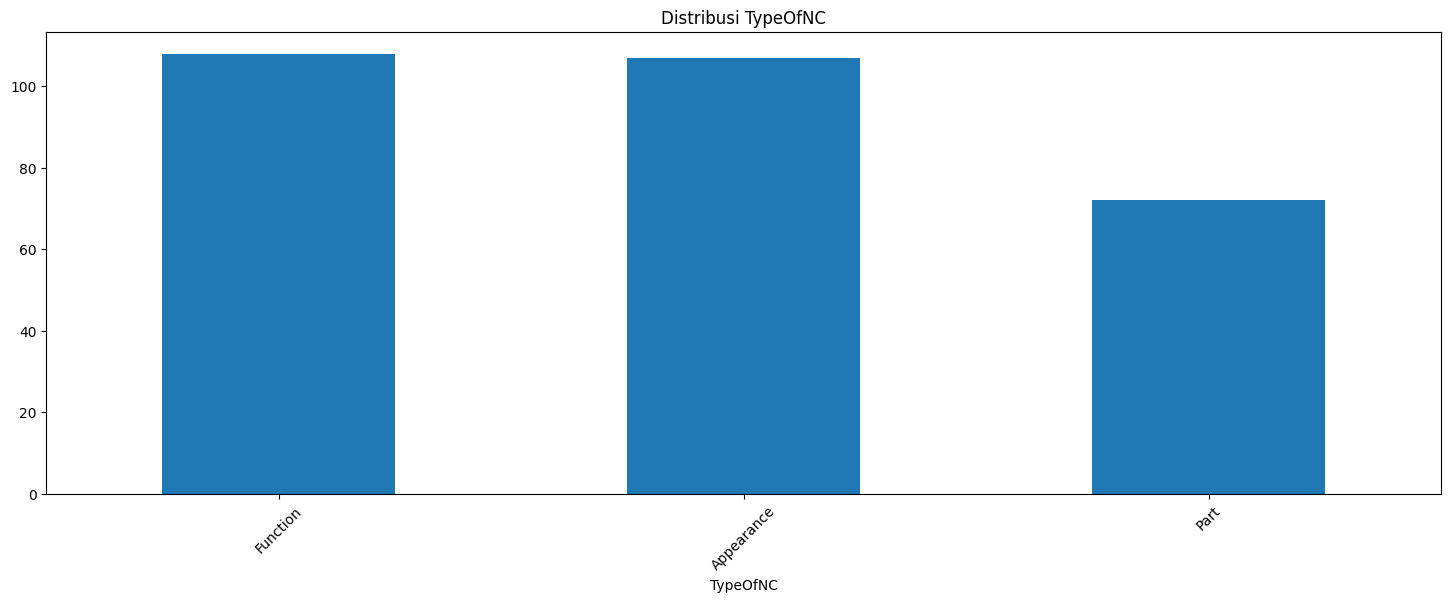

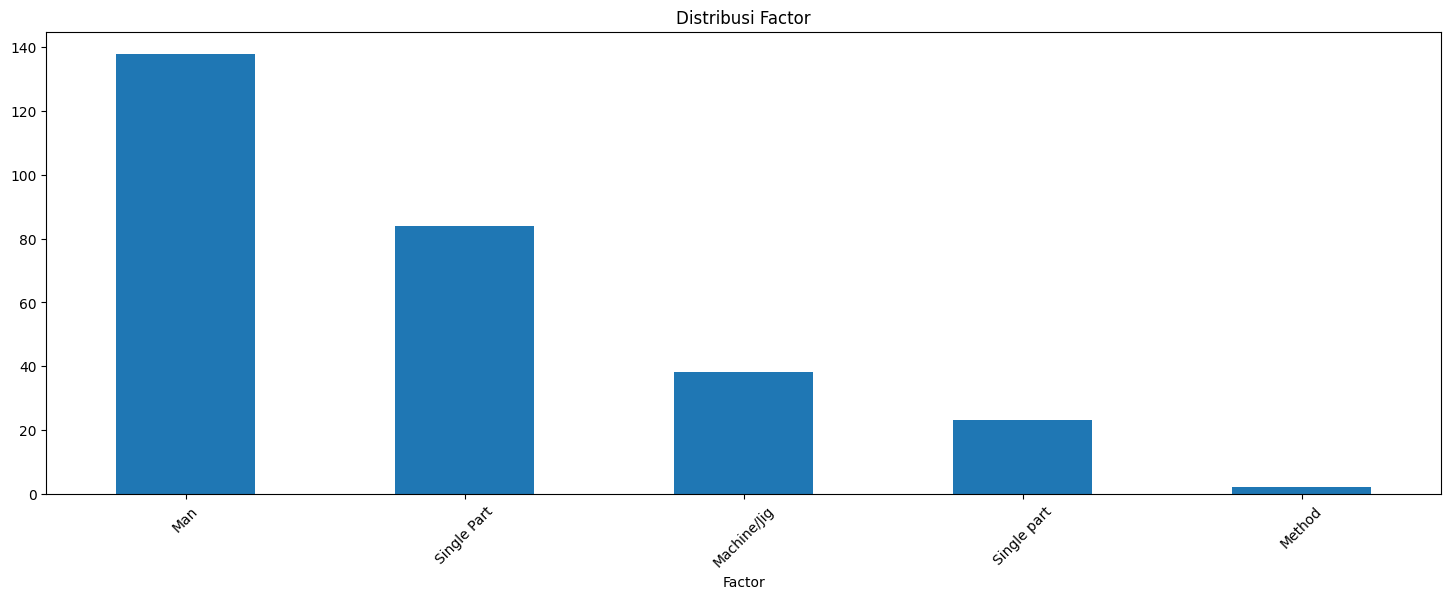

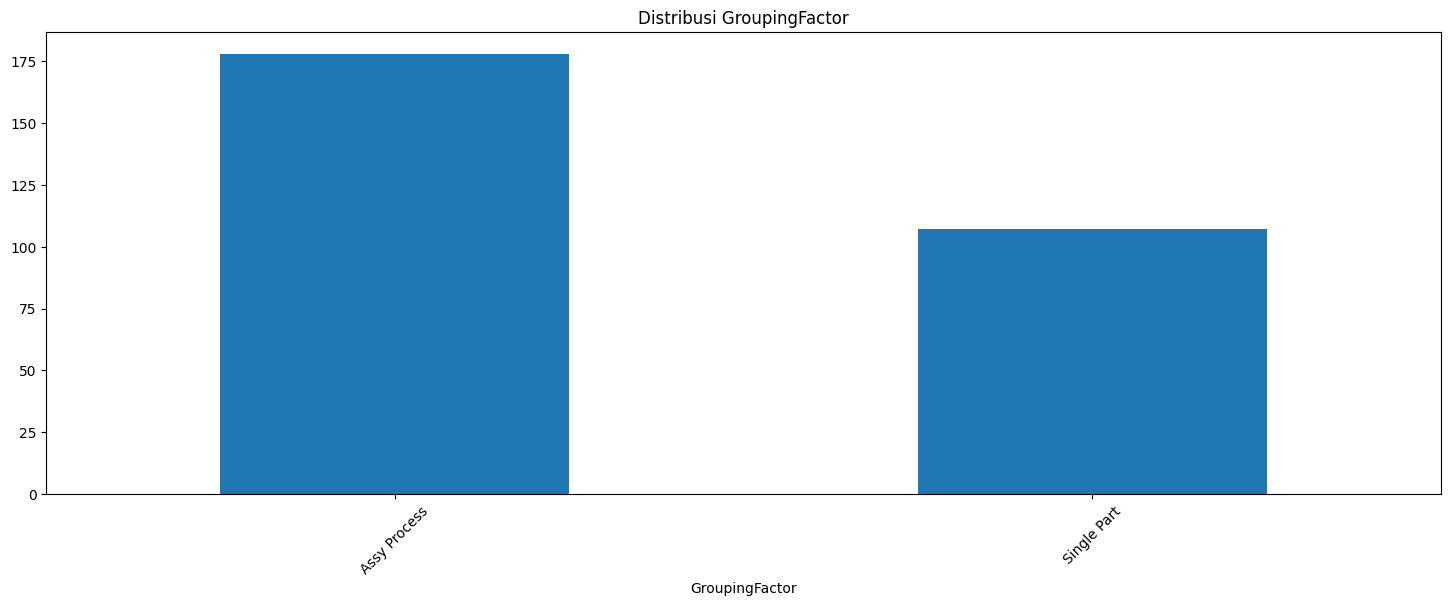

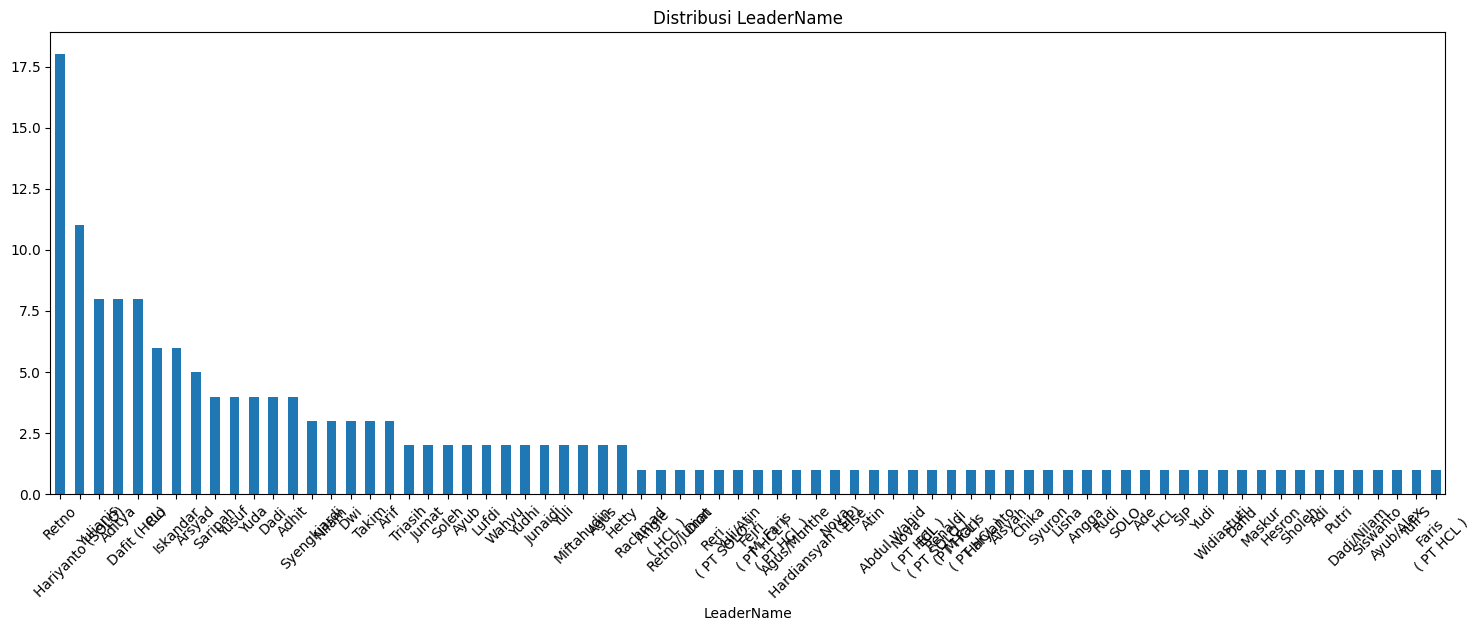

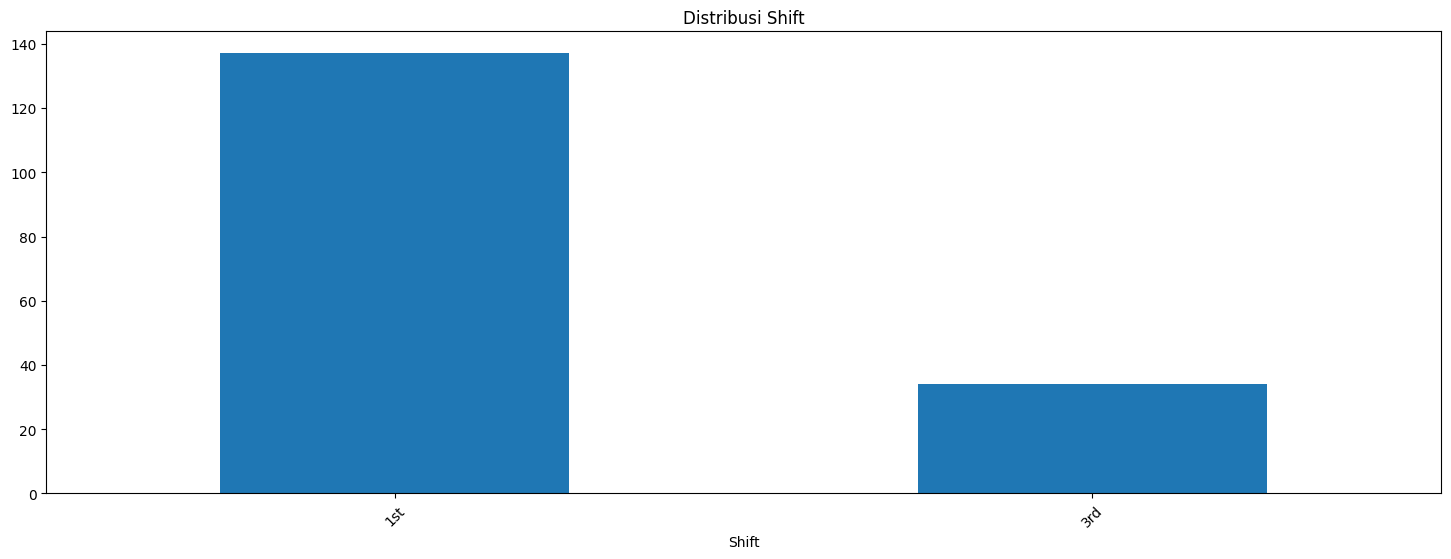

In [7]:
# Untuk variabel numerik
numeric_columns = raw.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(18, 6))
    sns.histplot(raw[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

# Untuk variabel kategorikal
categorical_columns = raw.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(18, 6))
    raw[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

## **Preprocessing**

### a. Check Missing Values

In [8]:
# check missing values
missing_values = raw.isnull().sum()

# tampilkan missing values
missing_values

Years                      0
Month                      0
Week                       0
FindingArea                0
Factory                    0
GroupingFactory            0
DepartmentResponsible      0
Product                    0
MainModel                  0
Model/Production Code      0
QTY                        1
SamplingChek               0
SamplingNC                 0
NC %                       0
NCDescription              0
TypeOfNC                   0
Factor                     2
GroupingFactor             2
LeaderName               116
DateProduce              116
TimeProduce              116
Shift                    116
dtype: int64

In [9]:
missing_num = 116/287 * 100
missing_num

40.41811846689895

Susunan dataset dapat terlihat diatas, dimana terdapat **21 kolom** dengan jumlah entri data sebanyak **287 entri**. Untuk kolom seperti `LeaderName`, `DataProduce`, `TimeProduce`, `Shift` yang memiliki data missing sebanyak 116 entri dari 287 atau **>40%** dari total data sehingga untuk handling missing values perlu dilakukan analisa lebih lanjut.

### b. Handling Missing Values

In [10]:
# mengganti nilai lots dengan asumsi 1 lots = 100
raw['QTY'] = raw['QTY'].replace('6 lots', 600)

# mengisi missing values dengan nilai median pada kolom numerical
raw['QTY'] = raw['QTY'].fillna(raw['QTY'].median())
raw['DateProduce'] = raw['DateProduce'].fillna(raw['DateProduce'].median())
raw['TimeProduce'] = raw['TimeProduce'].fillna(raw['TimeProduce'].median())

# mengisi missing valus dengan nilai modus pada kolomm categorical 
raw['Factor'] = raw['Factor'].fillna(raw['Factor'].mode()[0])
raw['GroupingFactor'] = raw['GroupingFactor'].fillna(raw['GroupingFactor'].mode()[0])
raw['Shift'] = raw['Shift'].fillna(raw['Shift'].mode()[0])

### c. Handle Inconsistent Values

In [11]:
# Mengubah format nilai di kolom 'Factor'
raw['Factor'] = raw['Factor'].replace({'Single part': 'Single Part'})

# Mengubah format nilai di kolom 'Week'
raw['Week'] = raw['Week'].replace({'1s': '1st'})

# Menampilkan beberapa baris pertama untuk memeriksa perubahan
print(raw[['Factor', 'Week']].tail())

          Factor Week
282  Single Part  2nd
283          Man  2nd
284          Man  3rd
285          Man  4th
286          Man  4th


### d. Check & Visualize Outlier

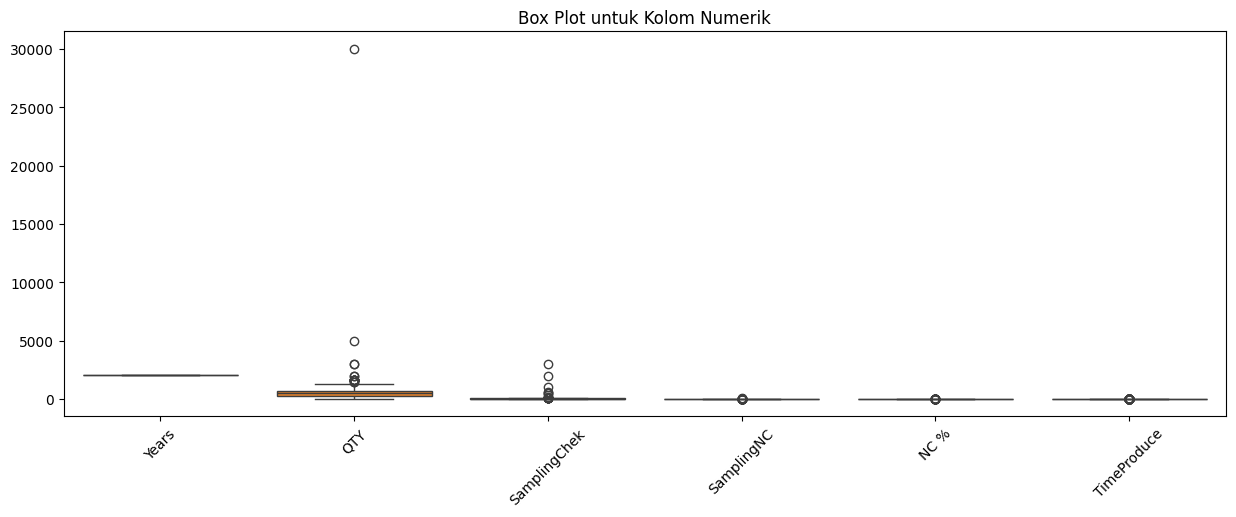

Kolom Years memiliki 0 outlier
Kolom QTY memiliki 17 outlier
Kolom SamplingChek memiliki 20 outlier
Kolom SamplingNC memiliki 49 outlier
Kolom NC % memiliki 39 outlier
Kolom TimeProduce memiliki 100 outlier


In [12]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    return outliers


# Deteksi outlier pada kolom numerik
numeric_columns = raw.select_dtypes(include=['int64', 'float64']).columns
outliers = detect_outliers(raw, numeric_columns)

# Visualisasi outlier menggunakan box plot
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw[numeric_columns])
plt.title('Box Plot untuk Kolom Numerik')
plt.xticks(rotation=45)
plt.show()

# Print jumlah outlier untuk setiap kolom
for col, indices in outliers.items():
    print(f"Kolom {col} memiliki {len(indices)} outlier")

### e. Handling Outlier

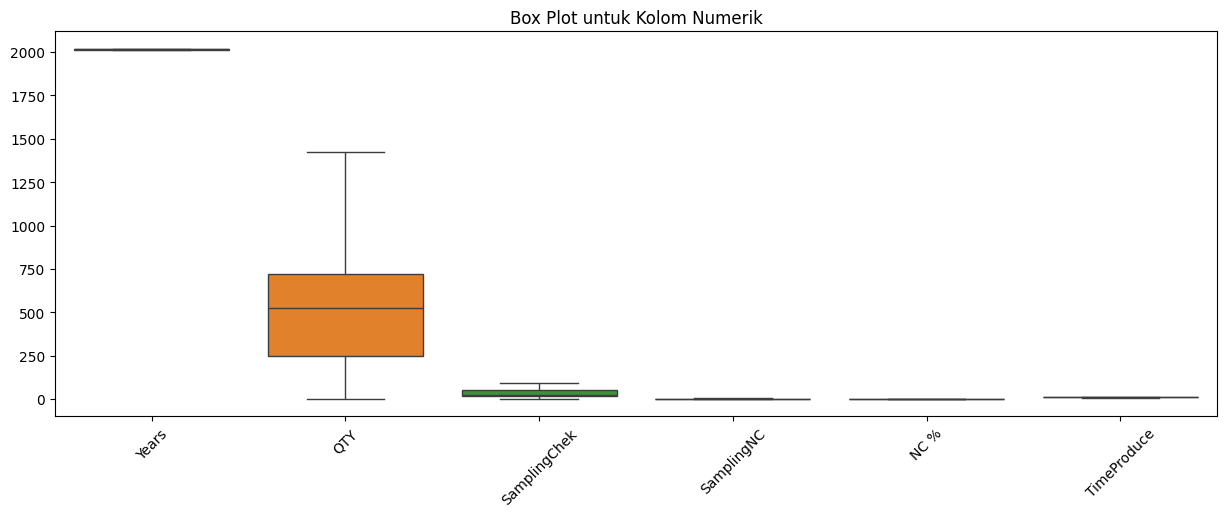

In [13]:
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

raw = handle_outliers(raw, numeric_columns)

# Visualisasi setelah handle outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw[numeric_columns])
plt.title('Box Plot untuk Kolom Numerik')
plt.xticks(rotation=45)
plt.show()

## **Correlation**

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

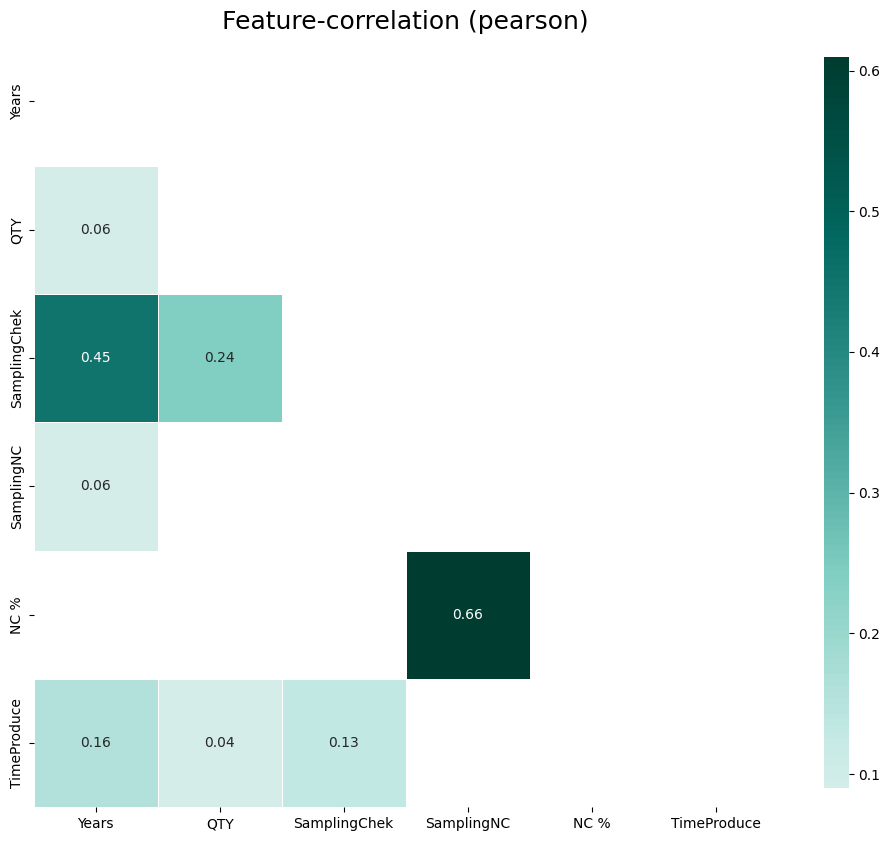

In [14]:
klib.corr_plot(raw, split='pos')

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

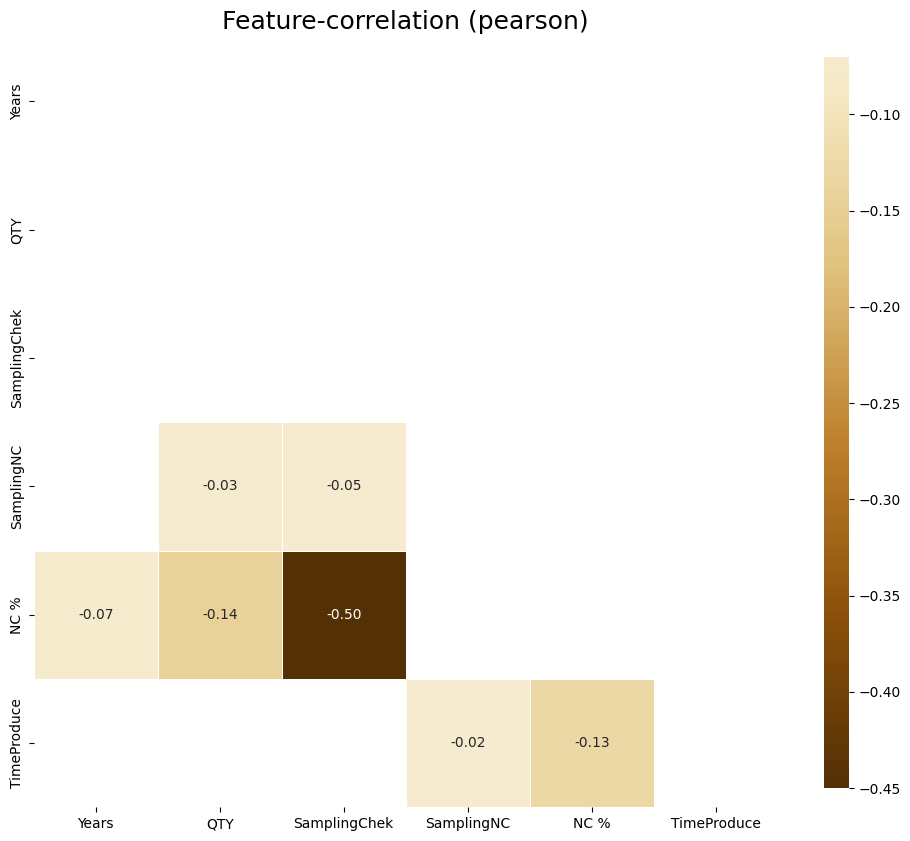

In [15]:
klib.corr_plot(raw, split='neg')

<Axes: title={'center': 'Feature-correlation (pearson)'}>

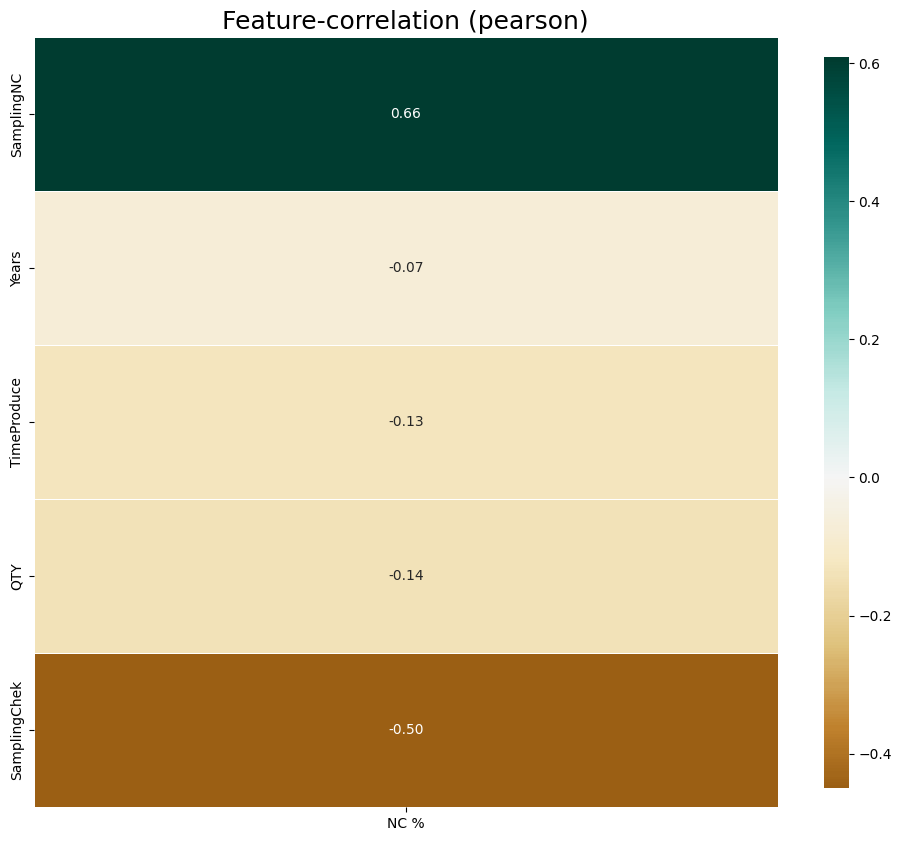

In [16]:
klib.corr_plot(raw, target='NC %')

## **Feature Engineering**

In [17]:
raw.columns

Index(['Years', 'Month', 'Week', 'FindingArea ', 'Factory', 'GroupingFactory',
       'DepartmentResponsible', 'Product', 'MainModel',
       'Model/Production Code', 'QTY', 'SamplingChek', 'SamplingNC', 'NC %',
       'NCDescription', 'TypeOfNC', 'Factor', 'GroupingFactor', 'LeaderName',
       'DateProduce', 'TimeProduce', 'Shift'],
      dtype='object')

In [18]:
# Membuat raw_cleaned dengan fitur yang direkomendasikan
features = ['SamplingNC', 'SamplingChek', 'QTY', 'TimeProduce', 'Years']
target = 'NC %'

raw_cleaned = raw[features + [target]].copy()

# Menampilkan beberapa baris pertama untuk memastikan
print(raw_cleaned.head())
print(raw_cleaned.info())

   SamplingNC  SamplingChek     QTY  TimeProduce  Years  NC %
0         1.0            20   480.0        10.31   2014  0.05
1         1.0            20  1425.0        10.31   2014  0.05
2         3.5            25   100.0        10.31   2014  0.45
3         2.0            50    50.0        10.31   2014  0.04
4         2.0             5  1000.0        10.31   2014  0.40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SamplingNC    287 non-null    float64
 1   SamplingChek  287 non-null    int64  
 2   QTY           287 non-null    float64
 3   TimeProduce   287 non-null    float64
 4   Years         287 non-null    int64  
 5   NC %          287 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 13.6 KB
None


## **Model**

### a. Split Dataset to Train-Test Set

In [19]:
# pisahkan feature dengan target
X = raw_cleaned.drop('NC %', axis=1)
y = raw_cleaned['NC %']

# scaling feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

### b. Training

In [20]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}\n")
    return mse, rmse, mae, r2

In [22]:
# Training dan evaluasi model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRFRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred, name)

Linear Regression Metrics:
MSE: 0.0082
RMSE: 0.0908
MAE: 0.0743
R2 Score: 0.6766

Random Forest Metrics:
MSE: 0.0019
RMSE: 0.0436
MAE: 0.0198
R2 Score: 0.9254

XGBoost Metrics:
MSE: 0.0015
RMSE: 0.0393
MAE: 0.0193
R2 Score: 0.9393



In [23]:
# Menentukan model terbaik berdasarkan RMSE
best_model = min(results, key=lambda x: results[x][1])
print(f"Model terbaik berdasarkan RMSE: {best_model}")

Model terbaik berdasarkan RMSE: XGBoost


## **Hyperparameter Tuning**

In [24]:
# Hyperparameter tuning untuk model terbaik
if best_model == "Linear Regression":
    print("Linear Regression tidak memerlukan hyperparameter tuning.")
elif best_model == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
else:  # XGBoost
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    }
    xgb = XGBRFRegressor(random_state=42)
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

# Evaluasi model terbaik setelah tuning
if best_model != "Linear Regression":
    print("Best parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    evaluate_model(y_test, y_pred, f"{best_model} (Tuned)")

Best parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.3, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=300, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...) (Tuned) Metrics:
MSE: 0.0134
RMSE: 0.1157
MAE: 0.0931
R2 Score: 0.4746



## **Save Best Model**

In [29]:
import joblib

# Simpan model terbaik
joblib.dump(best_model, '../model/best_model.joblib')

# Simpan scaler
joblib.dump(scaler, '../model/scaler.joblib')

['../model/scaler.joblib']